In [9]:
#importing libraries

%pip install scikit-learn --quiet

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression , Ridge, Lasso 
from sklearn.ensemble import RandomForestRegressor , HistGradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')




[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [10]:
#loading data

train = pd.read_csv(r"C:\Users\DELL\Downloads\house-prices-advanced-regression-techniques\train.csv")
test = pd.read_csv(r"C:\Users\DELL\Downloads\house-prices-advanced-regression-techniques\test.csv")


print ("train data set shape:", train.shape)
print ("test data set shape:", test.shape)

train data set shape: (1460, 81)
test data set shape: (1459, 80)


In [11]:
#overview of data 

print ("Training data preview:")
print (train.head())

print ("Test data preview:")
print (test.head())


print("Train dataset info:")
print(train.info())

print ("Test dataset info:")
print (test.info())

Training data preview:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice 

In [12]:
print ("columns in the datatset")
print (train.columns.tolist())

print("Statical summary:")
display(train.describe().T)

print("Missing values in train dataset:")
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

columns in the datatset
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorc

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Missing values in train dataset:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [13]:
#Data types for all the columns 

print ("Data types in training dataset:")
print (train.dtypes.value_counts())

print("Detailed view of data types:")
print (train.dtypes)

Data types in training dataset:
object     43
int64      35
float64     3
Name: count, dtype: int64
Detailed view of data types:
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [14]:
#  Missing values in train dataset
missing_train = train.isnull().sum()
missing_train = missing_train[missing_train > 0].sort_values(ascending=False)

print("Number of columns with missing values:", missing_train.shape[0])
print("\nTop 10 columns with most missing values in train dataset:\n")
print(missing_train.head(10))




Number of columns with missing values: 19

Top 10 columns with most missing values in train dataset:

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
dtype: int64


In [15]:
# Percentage of missing values
missing_percentage = (missing_train / len(train)) * 100
print("\nPercentage of missing values (Top 10):\n")
print(missing_percentage.head(10))


Percentage of missing values (Top 10):

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
dtype: float64


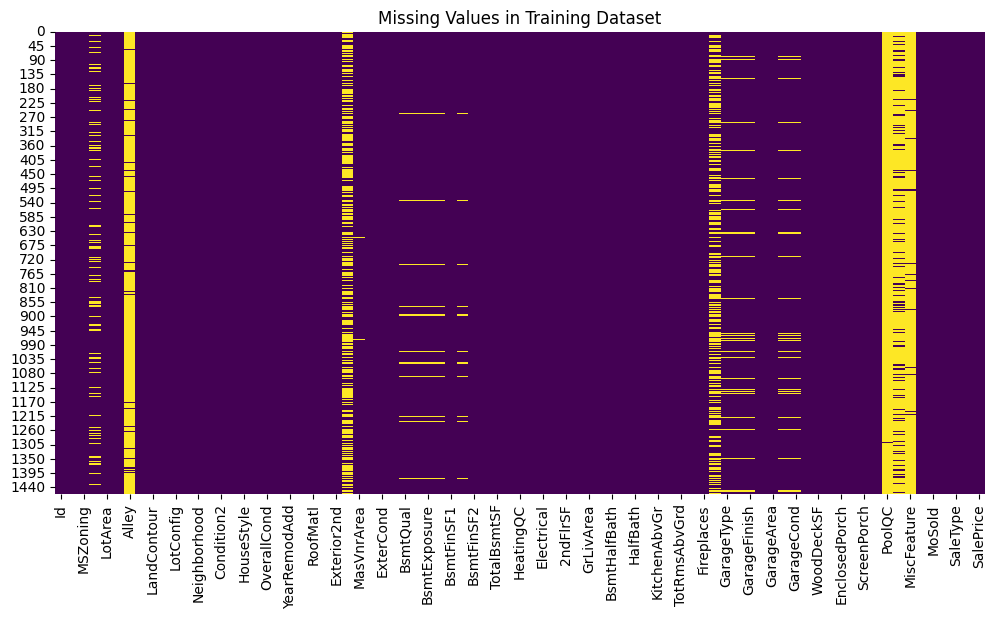

In [16]:

# Visualization of missing values with heatmap
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Training Dataset")
plt.show()


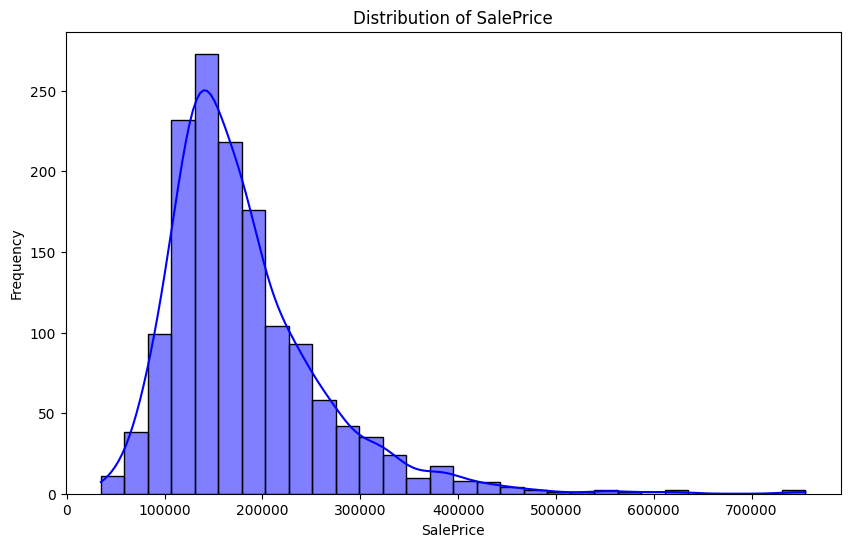

In [17]:
#variable distribution 

plt.figure(figsize=(10,6))
sns.histplot(train['SalePrice'], kde=True, color='blue', bins=30)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

In [18]:
print("Sales summary statistics:")
display(train['SalePrice'].describe())

from scipy.stats import skew, kurtosis

print ("Skewness:", skew(train['SalePrice']))
print ("Kurtosis:", kurtosis(train['SalePrice']))

Sales summary statistics:


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.880940746034036
Kurtosis: 6.509812011089439


In [19]:
for col in train.select_dtypes(include="object").columns:
    train[col] = train[col].str.strip().str.lower()
    test[col] = test[col].str.strip().str.lower()

In [20]:
train['MSZoning'].replace({'c (all)': 'c'}, inplace=True)
test['MSZoning'].replace({'c (all)': 'c'}, inplace=True)

In [21]:
train.replace("na", np.nan, inplace=True)
test.replace("na", np.nan, inplace=True)
train.replace("nan", np.nan, inplace=True)
test.replace("nan", np.nan, inplace=True)

In [22]:
#droping irrelevent columns

train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

In [23]:
#Total square footage (basement + 1st and 2nd floor)

train ['TotalSF'] = train ['TotalBsmtSF'] + train ['1stFlrSF'] + train ['2ndFlrSF']
test ['TotalSF'] = test ['TotalBsmtSF'] + test ['1stFlrSF'] + test ['2ndFlrSF']


#age of house (sold-build year)
train['HouseAge'] = train['YrSold'] - train['YearBuilt']
test['HouseAge'] = test['YrSold'] - test['YearBuilt']

#age since it is remodeled 
train['RemodAge'] = train['YrSold'] - train['YearRemodAdd']
test['RemodAge'] = test['YrSold'] - test['YearRemodAdd']

#total number of bathrooms
train['TotalBath'] = (train['FullBath'] + (0.5 * train['HalfBath']) +
                      train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))
test['TotalBath']  = (test['FullBath'] + (0.5 * test['HalfBath']) +
                      test['BsmtFullBath'] + (0.5 * test['BsmtHalfBath']))


#Total area of porch 
train['TotalPorchSF'] = (train['OpenPorchSF'] + train['3SsnPorch'] +
                         train['EnclosedPorch'] + train['ScreenPorch'] +
                         train['WoodDeckSF'])
test['TotalPorchSF']  = (test['OpenPorchSF'] + test['3SsnPorch'] +
                         test['EnclosedPorch'] + test['ScreenPorch'] +
                         test['WoodDeckSF'])


In [24]:
#Ordinal encoding 

quality_map = {
    "EX": 5 , "GD": 4, "TA": 3, "FA": 2, "PO": 1
}

ordinal_cols = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC",
                "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond",
]

for col in ordinal_cols:
    train[col] = train[col].map(quality_map)
    test[col] = test[col].map(quality_map)

In [25]:
#onehot encoding 

train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

train, test = train.align(test, join='left', axis=1, fill_value=0)

In [26]:
# select numeric features correctly and compute skewness

numeric_feats = train.select_dtypes(include=[np.number]).columns

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

skewed_features = skewed_feats[abs(skewed_feats) > 0.5].index

print("Skewed features before transformation:")
print(skewed_features)

train[skewed_features] = np.log1p(train[skewed_features])
test[skewed_features] = np.log1p(test[skewed_features])

Skewed features before transformation:
Index(['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF',
       'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch', 'BsmtHalfBath',
       'EnclosedPorch', 'MasVnrArea', 'OpenPorchSF', 'LotFrontage',
       'SalePrice', 'TotalSF', 'BsmtFinSF1', 'WoodDeckSF', 'TotalBsmtSF',
       'MSSubClass', '1stFlrSF', 'GrLivArea', 'TotalPorchSF', 'BsmtUnfSF',
       '2ndFlrSF', 'OverallCond', 'TotRmsAbvGrd', 'HalfBath', 'Fireplaces',
       'HouseAge', 'BsmtFullBath', 'RemodAge', 'YearRemodAdd', 'YearBuilt',
       'GarageYrBlt'],
      dtype='object')


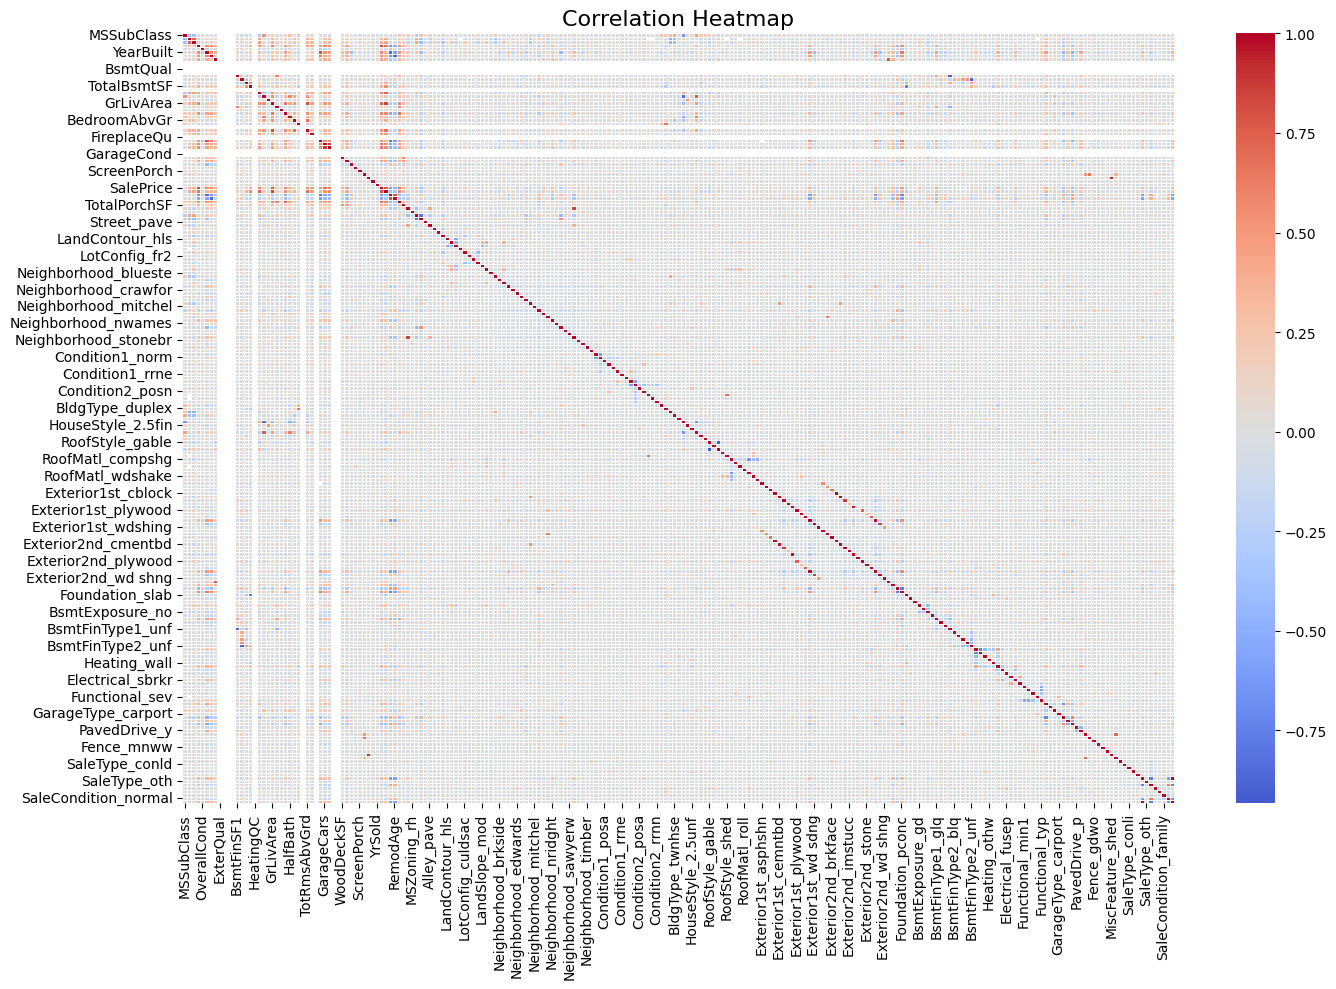

Top 10 features correlated with SalePrice:
SalePrice      1.000000
OverallQual    0.817185
TotalSF        0.807140
GrLivArea      0.730254
GarageCars     0.680625
TotalBath      0.673011
GarageArea     0.650888
1stFlrSF       0.608955
HouseAge       0.606352
FullBath       0.594771
YearBuilt      0.584443
Name: SalePrice, dtype: float64


In [27]:
# correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))
corr_matrix = train.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, center=0, cbar=True, linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

top_Corr = corr_matrix["SalePrice"].abs().sort_values(ascending=False).head(11)
print("Top 10 features correlated with SalePrice:")
print(top_Corr)

#correlation heatmap 


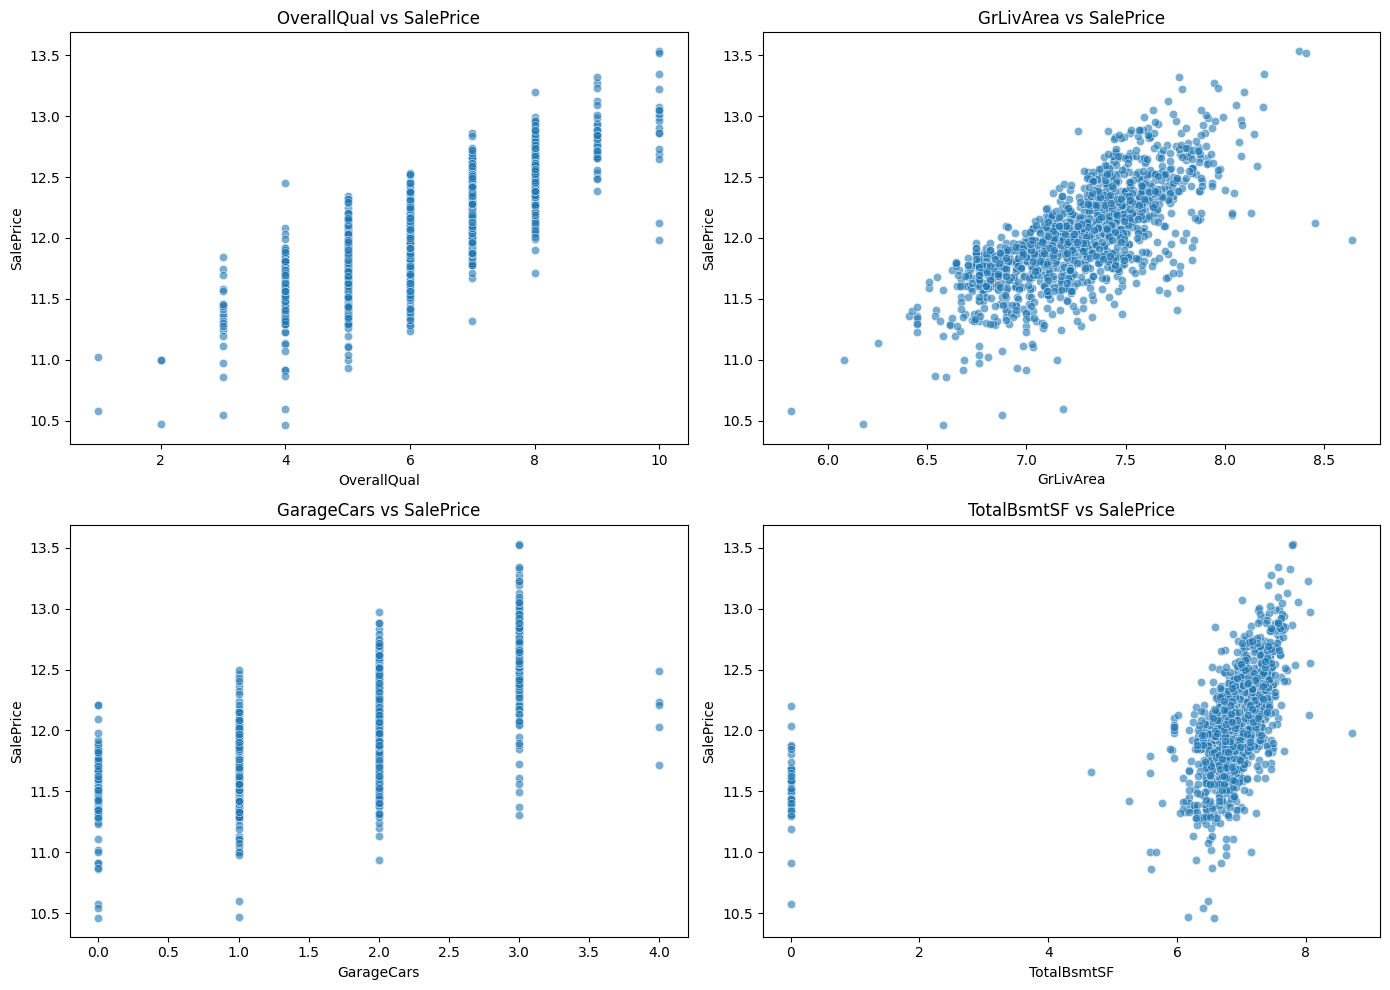

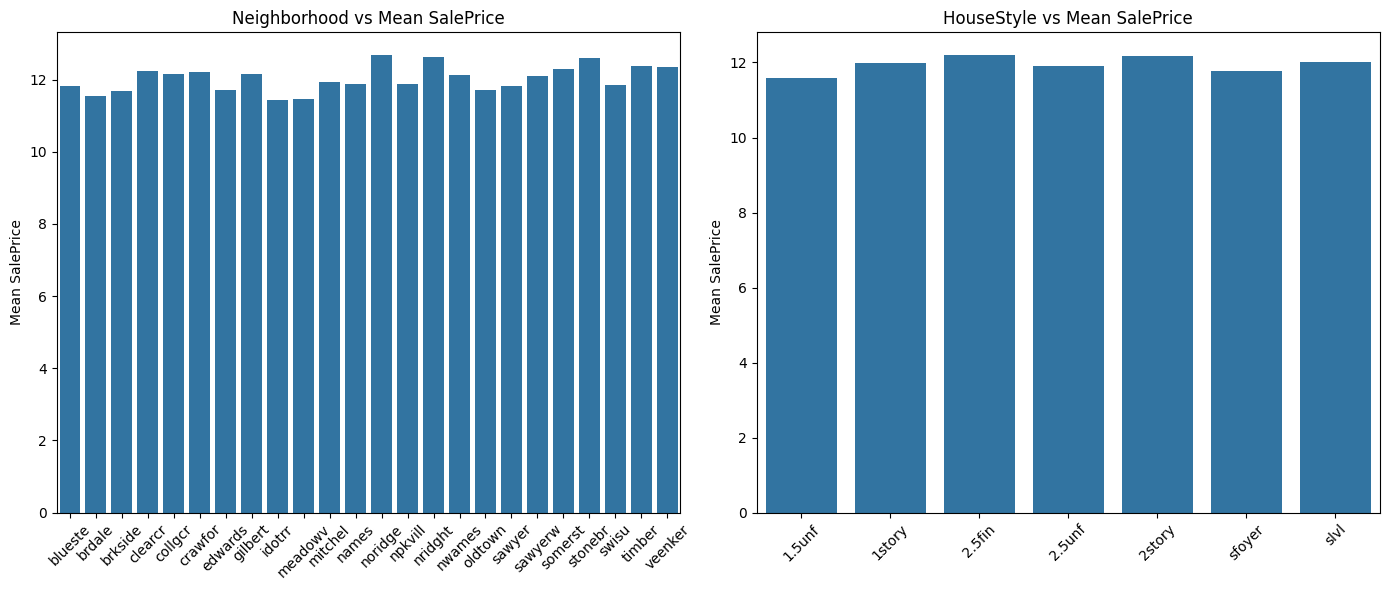

In [ ]:
top_features = ["OverallQual", "GrLivArea" , "GarageCars" ,"TotalBsmtSF"]

plt.figure (figsize = (14, 10))
for i,feature in enumerate (top_features , 1):
    plt.subplot(2,2,i)
    sns.scatterplot(x=train[feature], y= train["SalePrice"], alpha = 0.6)
    plt.title(f"{feature} vs SalePrice")
plt.tight_layout()
plt.show()




cat_features = ["Neighborhood", "HouseStyle"]

plt.figure(figsize=(14, 6))
for i, feature in enumerate(cat_features, 1):
    # Extract the original category names from one-hot encoded columns
    category_cols = [col for col in train.columns if col.startswith(feature + "_")]
    # Calculate mean SalePrice for each category
    mean_prices = {}
    for col in category_cols:
        mean_prices[col.replace(feature + "_", "")] = train.loc[train[col] == 1, "SalePrice"].mean()
    categories = list(mean_prices.keys())
    prices = list(mean_prices.values())
    plt.subplot(1, 2, i)
    sns.barplot(x=categories, y=prices)
    plt.xticks(rotation=45)
    plt.title(f"{feature} vs Mean SalePrice")
    plt.ylabel("Mean SalePrice")
plt.tight_layout()
plt.show()

In [31]:
from sklearn.model_selection import train_test_split 

x= train.drop("SalePrice", axis=1)
y= train["SalePrice"]

x_train, x_valid, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)


print ("Training set shape:" , x_train.shape)
print("Validation set shape:" , x_valid.shape)


Training set shape: (1168, 226)
Validation set shape: (292, 226)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = x.select_dtypes(include=["int64", "float64"]).columns
categorical_features = x.select_dtypes(include=["object"]).columns

print("Numeric features:", len(numeric_features))
print("Categorical features:", len(categorical_features))

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


x_train.replace([np.inf, -np.inf], np.nan, inplace=True)
x_valid.replace([np.inf, -np.inf], np.nan, inplace=True)


x_train_transformed = preprocessor.fit_transform(x_train)
x_valid_transformed = preprocessor.transform(x_valid)
x_valid_transformed = preprocessor.transform(x_valid)

print("Transformed training shape:", x_train_transformed.shape)
print("Transformed validation shape:", x_valid_transformed.shape)

Numeric features: 50
Categorical features: 0
Transformed training shape: (1168, 50)
Transformed validation shape: (292, 50)


In [37]:
#linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

from sklearn.impute import SimpleImputer

# Update numeric_transformer to include imputation
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Recreate preprocessor with imputer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

linreg_model = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

linreg_model.fit(x_train, y_train)

y_pred = linreg_model.predict(x_valid)

rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
r2 = r2_score(y_valid, y_pred)

print ("Linear Regression")
print("RMSE:", rmse)
print("R^2:", r2)


Linear Regression
RMSE: 0.13995189123700671
R^2: 0.8950408440097282


In [38]:
from sklearn.linear_model import Ridge, Lasso
ridge_model = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("regressor", Ridge(alpha=1.0 , random_state=42 ))
])

ridge_model.fit(x_train, y_train)
y_pred = ridge_model.predict(x_valid)

rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
r2 = r2_score(y_valid, y_pred)

print ("Ridge Regression")
print("RMSE:", rmse)
print("R^2:", r2)


Ridge Regression
RMSE: 0.1398682100735373
R^2: 0.8951663225349578


In [40]:
#lasso Regression 

lasso_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", Lasso(alpha=0.001, random_state=42, max_iter=10000))
])

lasso_model.fit(x_train, y_train)
y_pred_lasso = lasso_model.predict(x_valid)

lasso_rmse = np.sqrt(mean_squared_error(y_valid, y_pred_lasso))
lasso_r2 = r2_score(y_valid, y_pred_lasso)

print("Lasso Regression Performance:")
print(f"RMSE: {lasso_rmse:.2f}")
print(f"R²: {lasso_r2:.4f}")

Lasso Regression Performance:
RMSE: 0.14
R²: 0.8960


In [41]:
#Random forest 
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=200,   # number of trees
        max_depth=None,     # let trees grow fully
        random_state=42,
        n_jobs=-1           # use all CPU cores
    ))
])

rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_valid)

rf_rmse = np.sqrt(mean_squared_error(y_valid, y_pred_rf))
rf_r2 = r2_score(y_valid, y_pred_rf)


print("Random Forest Regression Performance:")
print(f"RMSE: {rf_rmse:.2f}")
print(f"R²: {rf_r2:.4f}")


Random Forest Regression Performance:
RMSE: 0.15
R²: 0.8747


In [43]:
from xgboost import XGBRegressor


xgb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(
        n_estimators=500,      
        learning_rate=0.05,    
        max_depth=4,           
        subsample=0.8,         
        colsample_bytree=0.8,  
        random_state=42,
        n_jobs=-1
    ))
])

xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_valid)

xgb_rmse = np.sqrt(mean_squared_error(y_valid, y_pred_xgb))
xgb_r2 = r2_score(y_valid, y_pred_xgb)

print("XGBoost Performance:")
print(f"RMSE: {xgb_rmse:.2f}")
print(f"R²: {xgb_r2:.4f}")


XGBoost Performance:
RMSE: 0.14
R²: 0.8975


In [45]:
from lightgbm import LGBMRegressor


lgbm_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=-1,       # no limit
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ))
])

lgbm_model.fit(x_train, y_train)
y_pred_lgbm = lgbm_model.predict(x_valid)

lgbm_rmse = np.sqrt(mean_squared_error(y_valid, y_pred_lgbm))
lgbm_r2 = r2_score(y_valid, y_pred_lgbm)

print("LightGBM Performance:")
print(f"RMSE: {lgbm_rmse:.2f}")
print(f"R²: {lgbm_r2:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3611
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 40
[LightGBM] [Info] Start training from score 12.030658
LightGBM Performance:
RMSE: 0.15
R²: 0.8830


In [50]:
final_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ))
])

# Replace inf values in train and test data
x.replace([np.inf, -np.inf], np.nan, inplace=True)
test.replace([np.inf, -np.inf], np.nan, inplace=True)

final_model.fit(x, y)

test_predictions = final_model.predict(test)



test_ids = pd.read_csv(r"C:\Users\DELL\Downloads\house-prices-advanced-regression-techniques\test.csv")["Id"]

submission = pd.DataFrame({
    "Id": test_ids,           # Kaggle requires 'Id' column
    "SalePrice": test_predictions
})

# Save to CSV
submission.to_csv("submission.csv", index=False)

print("Submission file 'submission.csv' created successfully!")


Submission file 'submission.csv' created successfully!


Model Performance Comparison:


,RMSE,R2
XGBoost,0.138311,0.897488
Lasso Regression,0.139301,0.896014
Ridge Regression,0.139868,0.895166
Linear Regression,0.139868,0.895166
LightGBM,0.147759,0.883003
Random Forest,0.152887,0.874742


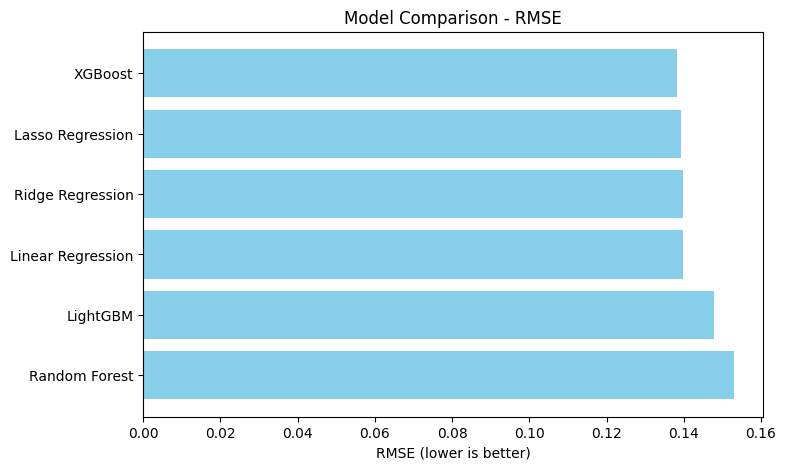

In [52]:
#comaprision of all model R2 score 

results = {
    "Linear Regression": {
        "RMSE": rmse, "R2": r2
    },
    "Ridge Regression": {
        "RMSE": rmse, "R2": r2
    },
    "Lasso Regression": {
        "RMSE": lasso_rmse, "R2": lasso_r2
    },
    "Random Forest": {
        "RMSE": rf_rmse, "R2": rf_r2
    },
    "XGBoost": {
        "RMSE": xgb_rmse, "R2": xgb_r2
    },
    "LightGBM": {
        "RMSE": lgbm_rmse, "R2": lgbm_r2
    }
}


results_df = pd.DataFrame(results).T.sort_values("RMSE")

print("Model Performance Comparison:")
display(results_df)

# Plot comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(results_df.index, results_df["RMSE"], color="skyblue")
plt.xlabel("RMSE (lower is better)")
plt.title("Model Comparison - RMSE")
plt.gca().invert_yaxis()
plt.show()
